In [3]:
import numpy as np
from func_main import f
from Method_Newt import df
import pandas as pd
import matplotlib.pyplot as plt
import time

# `Análise Pelo Método de Newton`

In [4]:
def df(Q, C):
    return C * np.exp(Q) - 8 * Q
def newton_mod(C, x0, err, max_iter=100):
    x1 = x0
    start_time = time.time()
    num_iterations = 0
    if abs(f(x0, C)) < err:
        return x1, 0, 0, 0  # Se já está dentro do erro, retorna sem calcular mais nada
    for i in range(max_iter):
        num_iterations += 1
        denom = df(x1, C)
        if denom == 0:
            return x1, None, time.time() - start_time, num_iterations  # Evitar divisão por zero
        x2 = x1 - f(x1, C) / denom
        if abs(f(x2, C)) < err or abs(x2 - x1) < err:
            break
        x1 = x2
    end_time = time.time()
    final_error = abs(f(x2, C))
    return x2, final_error, end_time - start_time, num_iterations

In [5]:
#Lista de variação do C
c_values = [1, 2, 3, 4, 5]
x0 = 0.5  # Estimativa inicial
err = 1e-4  # Tolerância de erro

results_newt = []
for C in c_values:
    root, final_error, execution_time, num_iterations = newton_mod(C, x0, err)
    if root < 0.7:
        results_newt.append((C, root.round(4), final_error, execution_time, num_iterations, 'Viável'))
    else:
        results_newt.append((C, root.round(4), final_error, execution_time, num_iterations, 'Inviável'))
df_resultsNewt = pd.DataFrame(results_newt, columns=['Custo (Bilhões)', 'Raiz Encontrada', 'Erro', 'Tempo (s)', 'Iterações', 'Viabilidade'])

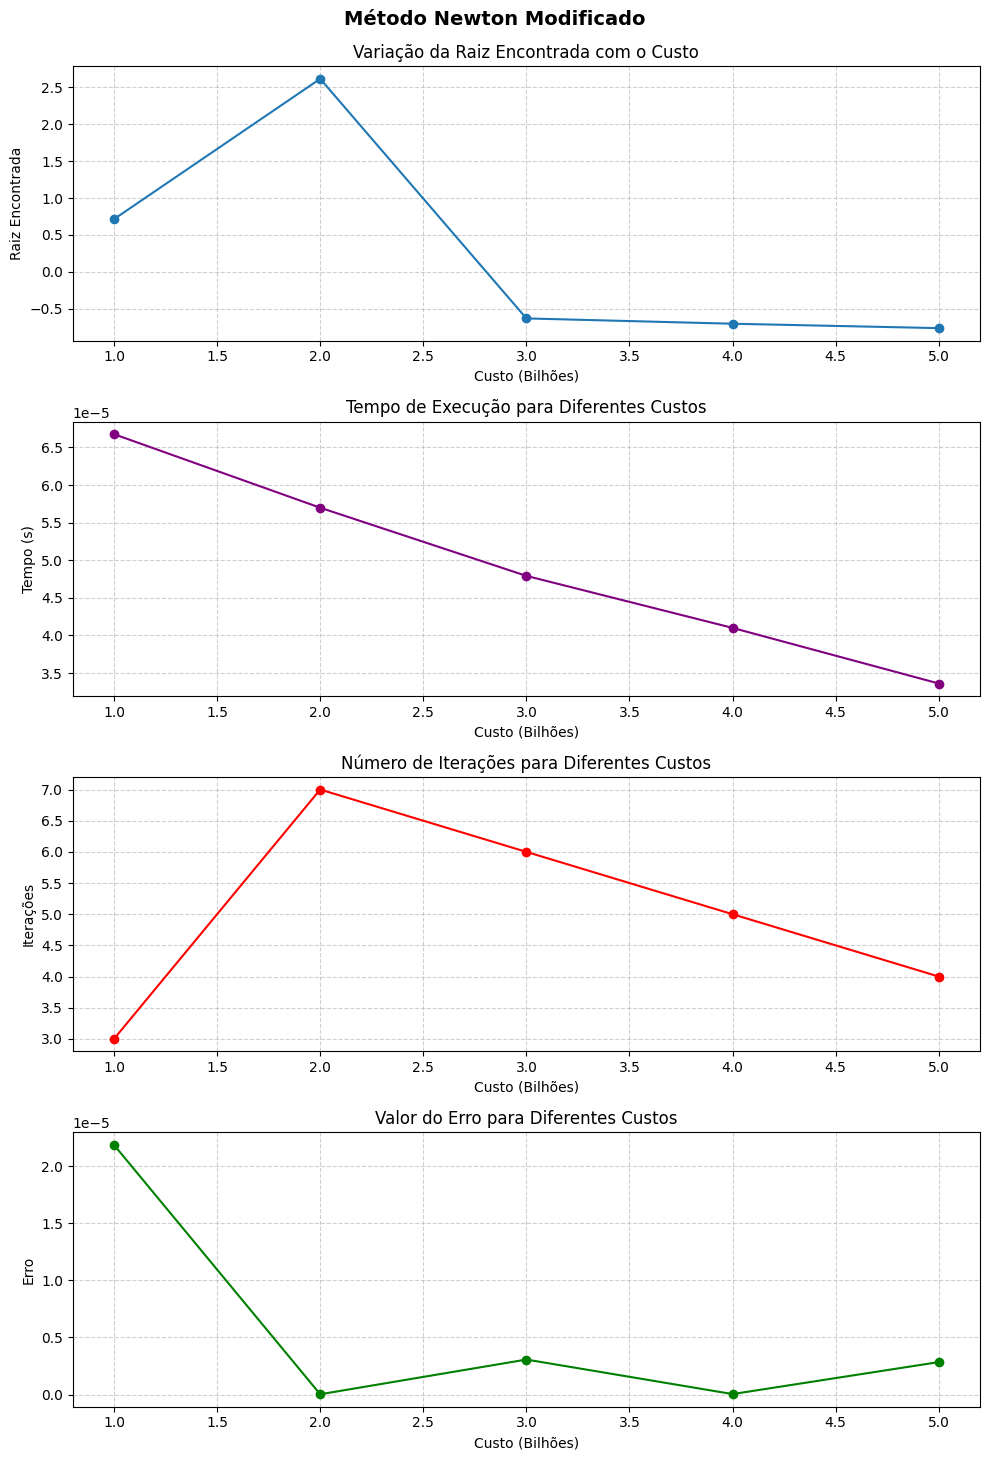

In [6]:
#Plotar gráficos comparativos de Raiz Encontrada, Tempo e Iterações
fig, axs = plt.subplots(4, 1, figsize=(10, 15))
fig.suptitle('Método Newton Modificado', fontsize = 14, fontweight= 'bold')
#Gráfico de Raiz Encontrada
axs[0].plot(df_resultsNewt['Custo (Bilhões)'], df_resultsNewt['Raiz Encontrada'], marker='o', linestyle='-')
axs[0].set_title('Variação da Raiz Encontrada com o Custo')
axs[0].set_xlabel('Custo (Bilhões)')
axs[0].set_ylabel('Raiz Encontrada')
axs[0].grid(axis='both', linestyle='--', alpha=0.6)

#Gráfico de Tempo
axs[1].plot(df_resultsNewt['Custo (Bilhões)'], df_resultsNewt['Tempo (s)'], color='purple', marker='o', linestyle='-')
axs[1].set_title('Tempo de Execução para Diferentes Custos')
axs[1].set_xlabel('Custo (Bilhões)')
axs[1].set_ylabel('Tempo (s)')
axs[1].grid(axis='both', linestyle='--', alpha=0.6)

#Gráfico de Iterações
axs[2].plot(df_resultsNewt['Custo (Bilhões)'], df_resultsNewt['Iterações'], color='red', marker='o', linestyle='-')
axs[2].set_title('Número de Iterações para Diferentes Custos')
axs[2].set_xlabel('Custo (Bilhões)')
axs[2].set_ylabel('Iterações')
axs[2].grid(axis='both', linestyle='--', alpha=0.6)

axs[3].plot(df_resultsNewt['Custo (Bilhões)'], df_resultsNewt['Erro'], color='green', marker='o', linestyle='-')
axs[3].set_title('Valor do Erro para Diferentes Custos')
axs[3].set_xlabel('Custo (Bilhões)')
axs[3].set_ylabel('Erro')
axs[3].grid(axis='both', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.01, 1, 0.99])  # Ajustar layout para não sobrepor o título
plt.show()

# `Análise Pelo Método Da Secante`

In [7]:
def secante(C, x0, x1, err1, err2, max_iter = 100):
    start_time = time.time()
    k = 0
    if abs(f(x0, C)) < err1:
        return x0, abs(f(x0, C)), 0, time.time() -start_time
    if abs(f(x1, C)) < err1 or abs(x1 - x0) < err2:
        return x1, abs(f(x0, C)), 1, time.time() - start_time
    while k < max_iter:
        if f(x1, C) == f(x0, C):  # Evitar divisão por zero
            return x1, None, k, time.time() - start_time
        x2 = x1 - (f(x1, C) * (x1 - x0)) / (f(x1, C) - f(x0, C))
        if abs(f(x2, C)) < err1 or abs(x2 - x1) < err2:
            return x2, abs(f(x2, C)), k + 1, time.time() - start_time
        x0, x1 = x1, x2
        k += 1
    return x2, abs(f(x2, C)), k, time.time() - start_time
def analise_sinais(C, a, int_max=100):
    b = a + 1
    k = 0
    while (f(a, C) * f(b, C)) > 0:
        if k > int_max:
            return print('Error')
        d = (a * f(b, C) - b * f(a, C)) / (f(b, C) - f(a, C))
        if (f(a, C) * f(d, C)) > 0:
            a = d
        else:
            b = d
        k += 1
    return b


In [8]:
# Lista de valores de C para testar
c_values = [1, 2, 3, 4, 5]
x0 = 0.5  # Estimativa inicial para x0
x1 = 0.6  # Estimativa inicial para x1
err1 = 1e-4  # Tolerância de erro para a função
err2 = 1e-4  # Tolerância de erro para a diferença entre as raízes
results_sec = []

for C in c_values:
    root, final_error, iterations, exec_time = secante(C, x0, x1, err1, err2)
    if root < 0.7 :      
        results_sec.append((C, root.round(4), final_error, exec_time, iterations, "Viável"))
    else: 
        results_sec.append((C, root.round(4), final_error, exec_time, iterations, "Inviável"))
df_resultsSec = pd.DataFrame(results_sec, columns=['Custo (Bilhões)', 'Raiz Encontrada', 'Erro', 'Tempo (s)', 'Iterações', 'Viabilidade'])

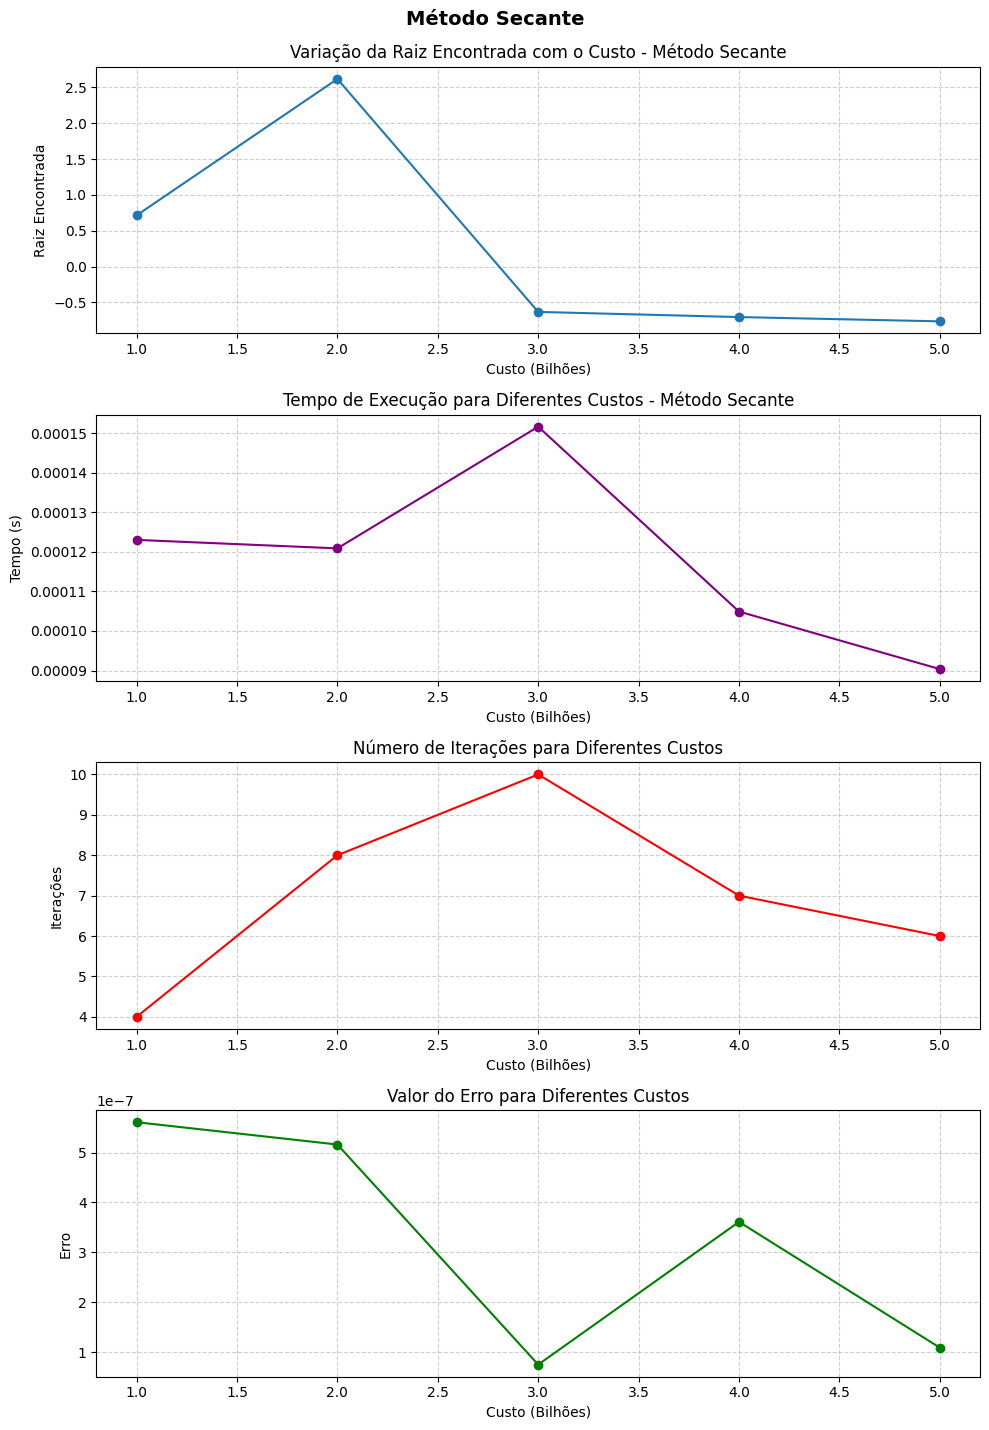

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(10, 15))
fig.suptitle('Método Secante', fontsize=14, fontweight='bold', )
#Gráfico de Raiz Encontrada
axs[0].plot(df_resultsSec['Custo (Bilhões)'], df_resultsSec['Raiz Encontrada'], marker='o', linestyle='-')
axs[0].set_title('Variação da Raiz Encontrada com o Custo - Método Secante')
axs[0].set_xlabel('Custo (Bilhões)')
axs[0].set_ylabel('Raiz Encontrada')
axs[0].grid(axis='both', linestyle='--', alpha=0.6)

#Gráfico de Tempo
axs[1].plot(df_resultsSec['Custo (Bilhões)'], df_resultsSec['Tempo (s)'], color='purple', marker='o', linestyle='-')
axs[1].set_title('Tempo de Execução para Diferentes Custos - Método Secante')
axs[1].set_xlabel('Custo (Bilhões)')
axs[1].set_ylabel('Tempo (s)')
axs[1].grid(axis='both', linestyle='--', alpha=0.6)

#Gráfico de Iterações
axs[2].plot(df_resultsSec['Custo (Bilhões)'], df_resultsSec['Iterações'], color='red', marker='o', linestyle='-')
axs[2].set_title('Número de Iterações para Diferentes Custos')
axs[2].set_xlabel('Custo (Bilhões)')
axs[2].set_ylabel('Iterações')
axs[2].grid(axis='both', linestyle='--', alpha=0.6)

axs[3].plot(df_resultsSec['Custo (Bilhões)'], df_resultsSec['Erro'], color='green', marker='o', linestyle='-')
axs[3].set_title('Valor do Erro para Diferentes Custos')
axs[3].set_xlabel('Custo (Bilhões)')
axs[3].set_ylabel('Erro')
axs[3].grid(axis='both', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.99])  # Ajustar layout para não sobrepor o título
plt.show()

# `Análise Pelo Método do Ponto Fixo`

In [10]:
def phi(Q, C):
    try:
        value = np.sqrt(C * np.exp(Q) / 4)
        if value < 0:
            return float('nan')
        return value
    except OverflowError:
        return float('nan')
    
def ponto_fixo(C, x0, err, max_iter=100):
    start_time = time.time()
    x1 = x0
    if abs(f(x0, C)) < err:
        return x0, abs(f(x0, C)), 0, time.time() - start_time
    for i in range(max_iter):
        x2 = phi(x1, C)
        if abs(f(x2, C)) < err or abs(x2 - x1) < err:
            return x2, abs(f(x2, C)), i + 1, time.time() - start_time
        x1 = x2
    return x1, abs(f(x1, C)), max_iter, time.time() - start_time

In [11]:
c_values = [1, 2, 3, 4, 5]
x0 = 0.5  # Estimativa inicial
err = 1e-4  # Tolerância de erro
results_mpf = []
for C in c_values:
    root, final_error, iterations, exec_time = ponto_fixo(C, x0 , err)
    if root > 0.7 or root=='inf':
        results_mpf.append((C, root.round(4), final_error, exec_time, iterations, "Inviável"))
    else: 
        results_mpf.append((C, root.round(4), final_error, exec_time, iterations, "Viável"))
df_resultsMpf = pd.DataFrame(results_mpf, columns=['Custo (Bilhões)', 'Raiz Encontrada', 'Erro', 'Tempo (s)', 'Iterações', 'Viabilidade'])

/home/arturpaschoal/TrabalhoMetodosNumericos/codigo_fonte/func_main.py:5: RuntimeWarning: overflow encountered in exp
  return C*np.exp(Q) - 4*Q**2
/tmp/ipykernel_23533/3928843523.py:3: RuntimeWarning: overflow encountered in exp
  value = np.sqrt(C * np.exp(Q) / 4)
/home/arturpaschoal/TrabalhoMetodosNumericos/codigo_fonte/func_main.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  return C*np.exp(Q) - 4*Q**2
/tmp/ipykernel_23533/3928843523.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(f(x2, C)) < err or abs(x2 - x1) < err:


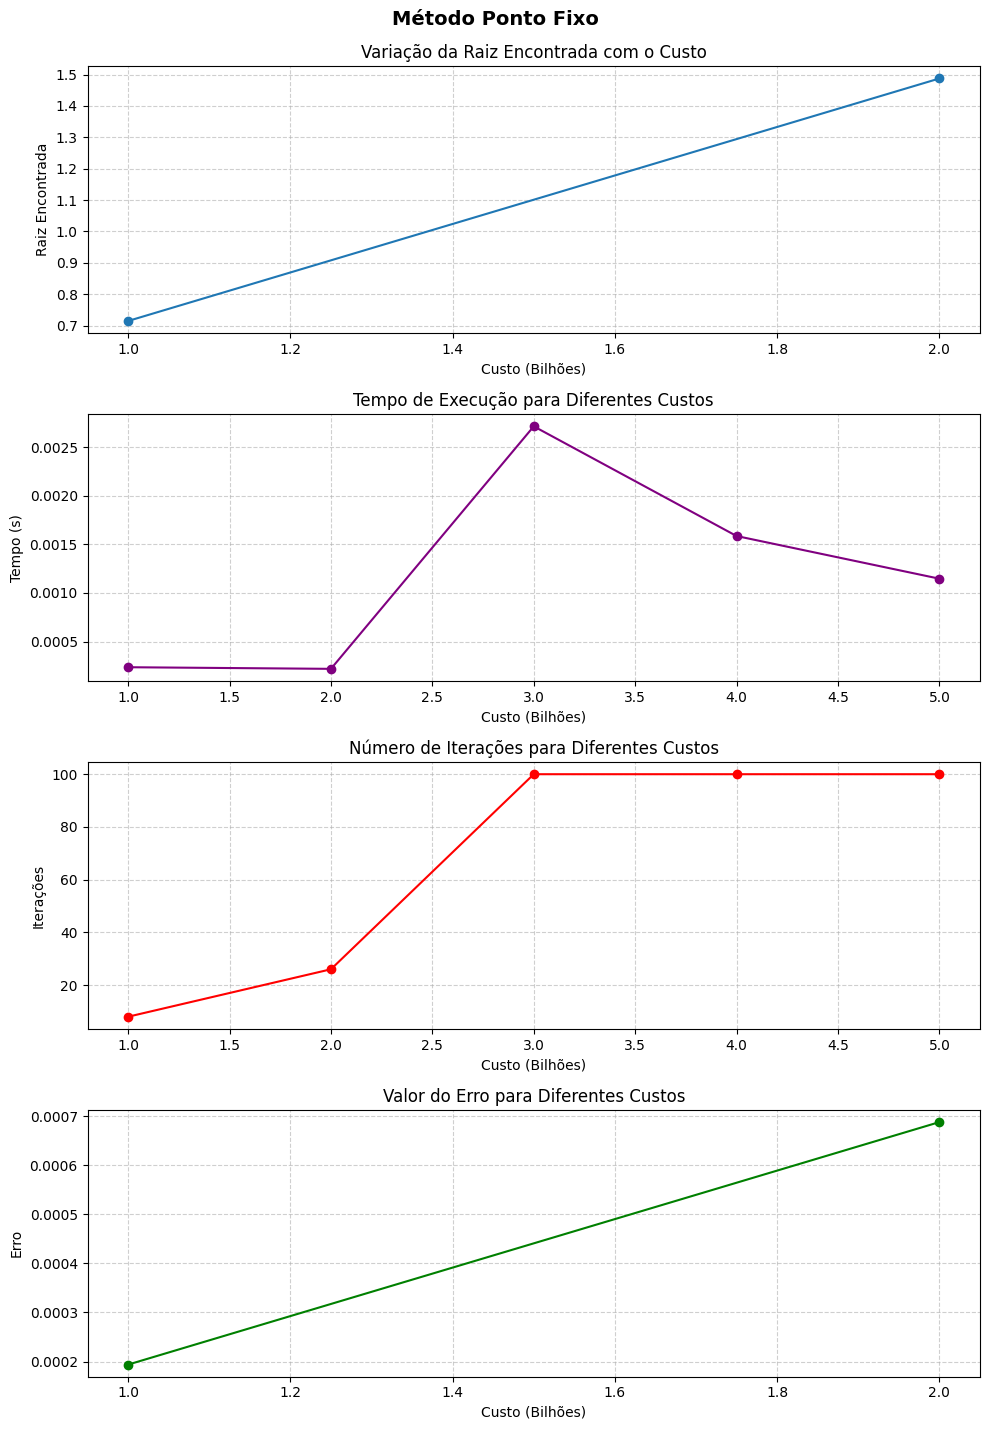

In [12]:
fig, axs = plt.subplots(4, 1, figsize=(10, 15))
fig.suptitle('Método Ponto Fixo', fontsize = 14, fontweight = 'bold')
#Gráfico de Raiz Encontrada
axs[0].plot(df_resultsMpf['Custo (Bilhões)'], df_resultsMpf['Raiz Encontrada'], marker='o', linestyle='-')
axs[0].set_title('Variação da Raiz Encontrada com o Custo')
axs[0].set_xlabel('Custo (Bilhões)')
axs[0].set_ylabel('Raiz Encontrada')
axs[0].grid(axis='both', linestyle='--', alpha=0.6)

#Gráfico de Tempo
axs[1].plot(df_resultsMpf['Custo (Bilhões)'], df_resultsMpf['Tempo (s)'], color='purple', marker='o', linestyle='-')
axs[1].set_title('Tempo de Execução para Diferentes Custos')
axs[1].set_xlabel('Custo (Bilhões)')
axs[1].set_ylabel('Tempo (s)')
axs[1].grid(axis='both', linestyle='--', alpha=0.6)

#Gráfico de Iterações
axs[2].plot(df_resultsMpf['Custo (Bilhões)'], df_resultsMpf['Iterações'], color='red', marker='o', linestyle='-')
axs[2].set_title('Número de Iterações para Diferentes Custos')
axs[2].set_xlabel('Custo (Bilhões)')
axs[2].set_ylabel('Iterações')
axs[2].grid(axis='both', linestyle='--', alpha=0.6)
axs[3].plot(df_resultsMpf['Custo (Bilhões)'], df_resultsMpf['Erro'], color='green', marker='o', linestyle='-')
axs[3].set_title('Valor do Erro para Diferentes Custos')
axs[3].set_xlabel('Custo (Bilhões)')
axs[3].set_ylabel('Erro')
axs[3].grid(axis='both', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.99])  # Ajustar layout para não sobrepor o título
plt.show()

# `Comparativo Das Variações Do Custo em Tabela`

In [13]:
pd.options.display.float_format = '{:.12f}'.format
df_results = pd.DataFrame(results_newt, columns=['Custo (Bilhões)', 'Raiz Encontrada', 'Erro', 'Tempo (s)', 'Iterações', 'Viabilidade'])
styled_df1 = df_results.style.format({'Erro': '{:.4e}'}).set_properties(**{'text-align': 'center'}).hide(axis='index')

df_results2 = pd.DataFrame(results_sec, columns=['Custo (Bilhões)', 'Raiz Encontrada', 'Erro', 'Tempo (s)', 'Iterações', 'Viabilidade'],)
pd.options.display.float_format = '{:.12f}'.format
styled_df2 = df_results2.style.format({'Erro': '{:.4e}'}).set_properties(**{'text-align': 'center'}).hide(axis='index')

df_results3 = pd.DataFrame(results_mpf, columns=['Custo (Bilhões)', 'Raiz Encontrada', 'Erro', 'Tempo (s)', 'Iterações', 'Viabilidade'])
pd.options.display.float_format = '{:.12f}'.format  # Ajustar formatação para melhor visualização
styled_df3 = df_results3.style.format({'Erro': '{:.4e}'}).set_properties(**{'text-align': 'center'}).hide(axis='index')


display(styled_df1)
display(styled_df2)
display(styled_df3)

Custo (Bilhões),Raiz Encontrada,Erro,Tempo (s),Iterações,Viabilidade
1,0.714800,2.1855e-05,0.000067,3,Inviável
2,2.617900,2.7630e-08,0.000057,7,Inviável
3,-0.631500,3.0653e-06,0.000048,6,Viável
4,-0.703500,4.3996e-08,0.000041,5,Viável
5,-0.763300,2.8434e-06,0.000034,4,Viável


Custo (Bilhões),Raiz Encontrada,Erro,Tempo (s),Iterações,Viabilidade
1,0.714800,5.6075e-07,0.000123,4,Inviável
2,2.617900,5.1607e-07,0.000121,8,Inviável
3,-0.631500,7.5469e-08,0.000152,10,Viável
4,-0.703500,3.6123e-07,0.000105,7,Viável
5,-0.763300,1.0938e-07,0.000090,6,Viável


Custo (Bilhões),Raiz Encontrada,Erro,Tempo (s),Iterações,Viabilidade
1,0.714800,1.9374e-04,0.000236,8,Inviável
2,1.487700,6.8833e-04,0.000219,26,Inviável
3,inf,nan,0.002713,100,Inviável
4,inf,nan,0.001585,100,Inviável
5,inf,nan,0.001146,100,Inviável
